In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Treatment Prediciton.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,Target
0,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,2,0,1,648,250,V27,6,None,None,Drug
1,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,0,0,0,8,250.43,403,7,None,None,Solo_Insulin
2,42570,77586282,Caucasian,Male,[80-90),?,1,6,7,10,...,0,0,0,428,411,427,8,None,None,Solo_Insulin
3,73578,86328819,AfricanAmerican,Male,[60-70),?,1,3,7,12,...,0,0,0,999,507,996,9,None,None,Solo_Insulin
4,84222,108662661,Caucasian,Female,[50-60),?,1,1,7,3,...,0,0,0,682,174,250,3,None,None,Drug


In [3]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'Target'],
      dtype='object')

In [4]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,2.848300e+04,2.848300e+04,28483.000000,28483.000000,28483.000000,28483.000000,28483.000000,28483.000000,28483.000000,28483.000000,28483.000000,28483.000000,28483.000000
mean,1.671593e+08,5.098437e+07,2.038479,3.829091,5.639785,4.213847,42.199031,1.376786,15.647053,0.298073,0.118070,0.412176,7.182565
std,1.070876e+08,4.006126e+07,1.435183,5.414301,4.118983,2.958212,20.169810,1.722195,8.066531,1.065698,0.524183,0.906736,2.053944
min,4.257000e+04,7.290000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.295239e+07,1.975219e+07,1.000000,1.000000,1.000000,2.000000,30.000000,0.000000,10.000000,0.000000,0.000000,0.000000,5.000000
50%,1.504489e+08,4.173410e+07,1.000000,1.000000,7.000000,3.000000,43.000000,1.000000,14.000000,0.000000,0.000000,0.000000,8.000000
75%,2.397768e+08,8.545104e+07,3.000000,3.000000,7.000000,6.000000,56.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438478e+08,1.895026e+08,8.000000,28.000000,22.000000,14.000000,121.000000,6.000000,69.000000,29.000000,25.000000,16.000000,16.000000


In [5]:
df.isna().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
Target                      0
dtype: int64

In [6]:
df.shape

(28483, 25)

In [7]:
df = df.replace('?',np.nan)

In [8]:
df.isna().sum()

encounter_id                    0
patient_nbr                     0
race                          834
gender                          0
age                             0
weight                      27772
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  11495
medical_specialty           13406
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          3
diag_2                        171
diag_3                        585
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
Target                          0
dtype: int64

In [9]:

for column in df.columns:
    print(column,':',round(df[column].isnull().sum()/df.shape[0] * 100, ndigits=2),'% of missing values')

encounter_id : 0.0 % of missing values
patient_nbr : 0.0 % of missing values
race : 2.93 % of missing values
gender : 0.0 % of missing values
age : 0.0 % of missing values
weight : 97.5 % of missing values
admission_type_id : 0.0 % of missing values
discharge_disposition_id : 0.0 % of missing values
admission_source_id : 0.0 % of missing values
time_in_hospital : 0.0 % of missing values
payer_code : 40.36 % of missing values
medical_specialty : 47.07 % of missing values
num_lab_procedures : 0.0 % of missing values
num_procedures : 0.0 % of missing values
num_medications : 0.0 % of missing values
number_outpatient : 0.0 % of missing values
number_emergency : 0.0 % of missing values
number_inpatient : 0.0 % of missing values
diag_1 : 0.01 % of missing values
diag_2 : 0.6 % of missing values
diag_3 : 2.05 % of missing values
number_diagnoses : 0.0 % of missing values
max_glu_serum : 0.0 % of missing values
A1Cresult : 0.0 % of missing values
Target : 0.0 % of missing values


weight, medical_specialty and payer code has higher percentage of missing values

In [10]:
for col in df.columns:
    print(col,':',df[col].nunique())

encounter_id : 28483
patient_nbr : 28469
race : 5
gender : 3
age : 10
weight : 8
admission_type_id : 8
discharge_disposition_id : 25
admission_source_id : 16
time_in_hospital : 14
payer_code : 17
medical_specialty : 63
num_lab_procedures : 113
num_procedures : 7
num_medications : 68
number_outpatient : 23
number_emergency : 14
number_inpatient : 14
diag_1 : 591
diag_2 : 599
diag_3 : 646
number_diagnoses : 16
max_glu_serum : 4
A1Cresult : 4
Target : 2


checking the columns values which has unique values upto 25

In [11]:
for col in df.columns:
    if len(df[col].unique()) <= 25:
        print(col,'-',df[col].unique())

race - ['AfricanAmerican' 'Caucasian' nan 'Other' 'Asian' 'Hispanic']
gender - ['Female' 'Male' 'Unknown/Invalid']
age - ['[20-30)' '[30-40)' '[80-90)' '[60-70)' '[50-60)' '[70-80)' '[40-50)'
 '[10-20)' '[0-10)' '[90-100)']
weight - [nan '[75-100)' '[50-75)' '[0-25)' '[125-150)' '[25-50)' '[100-125)'
 '[150-175)' '[175-200)']
admission_type_id - [1 2 3 6 4 5 8 7]
discharge_disposition_id - [ 1  6  3 11  5  2 25 10  7  4  8 14 13 18 22 23 16 17 20  9 15 28 19 24
 27]
admission_source_id - [ 7  4  2  1 20 17  8  6  5  3  9 14 10 11 22 13]
time_in_hospital - [ 2 10 12  3  1  6  5  7  4  9  8 14 11 13]
payer_code - [nan 'MC' 'UN' 'BC' 'CP' 'HM' 'MD' 'CM' 'SP' 'DM' 'PO' 'WC' 'SI' 'CH' 'OG'
 'OT' 'MP' 'FR']
num_procedures - [5 1 0 3 2 4 6]
number_outpatient - [ 2  0  1  3  4  8  5 11 15  6 10  7  9 12 29 14 21 13 17 16 25 20 24]
number_emergency - [ 0  1  2  6  8 25  3  4  5  7 11 12 20 16]
number_inpatient - [ 1  0  5  2  3  4  8  7  6  9 10 12 16 13]
number_diagnoses - [ 6  7  8  9  3  5  

filtering the columns containing the word id

In [12]:
cols_with_id = []
for col in df.columns:
    if 'id' in col:
        cols_with_id.append(col)

cols_with_id

['encounter_id',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id']

# Race

In [13]:
race_values_count = df['race'].value_counts()
race_values_count = pd.DataFrame(race_values_count)
race_values_count

,race
Caucasian,20918
AfricanAmerican,5464
Hispanic,568
Other,491
Asian,208


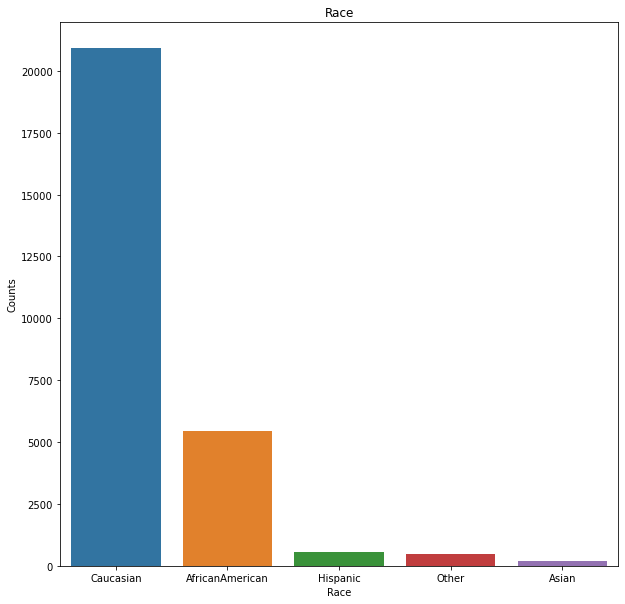

In [14]:
plt.figure(figsize=(10,10))
sns.barplot(x=race_values_count.index, y=race_values_count.race)
plt.title('Race')
plt.xlabel('Race')
plt.ylabel('Counts')
plt.show()

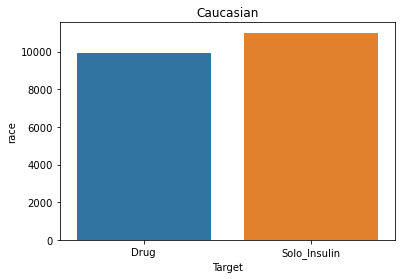

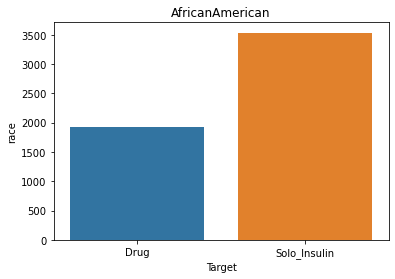

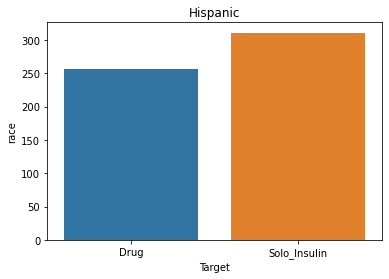

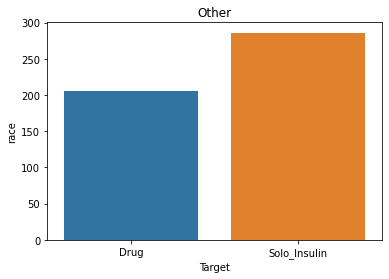

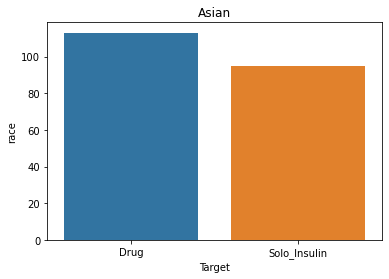

In [15]:
for race in race_values_count.index:
    data = df.copy()

    data = data[data['race'] == race]
    data = pd.DataFrame(data.groupby('Target')['race'].count().reset_index())

    sns.barplot(data.Target,data.race)
    plt.title(race)
    plt.show()

# Gender

In [16]:
gender_values_count = df['gender'].value_counts()
gender_values_count

Female             15002
Male               13479
Unknown/Invalid        2
Name: gender, dtype: int64

In [17]:
medical_values_count = df['medical_specialty'].value_counts()
medical_values_count = pd.DataFrame(medical_values_count)
medical_values_count

,medical_specialty
InternalMedicine,4348
Family/GeneralPractice,2094
Emergency/Trauma,1789
Cardiology,1592
Surgery-General,812
...,...
Cardiology-Pediatric,1
Speech,1
PhysicianNotFound,1
Dentistry,1


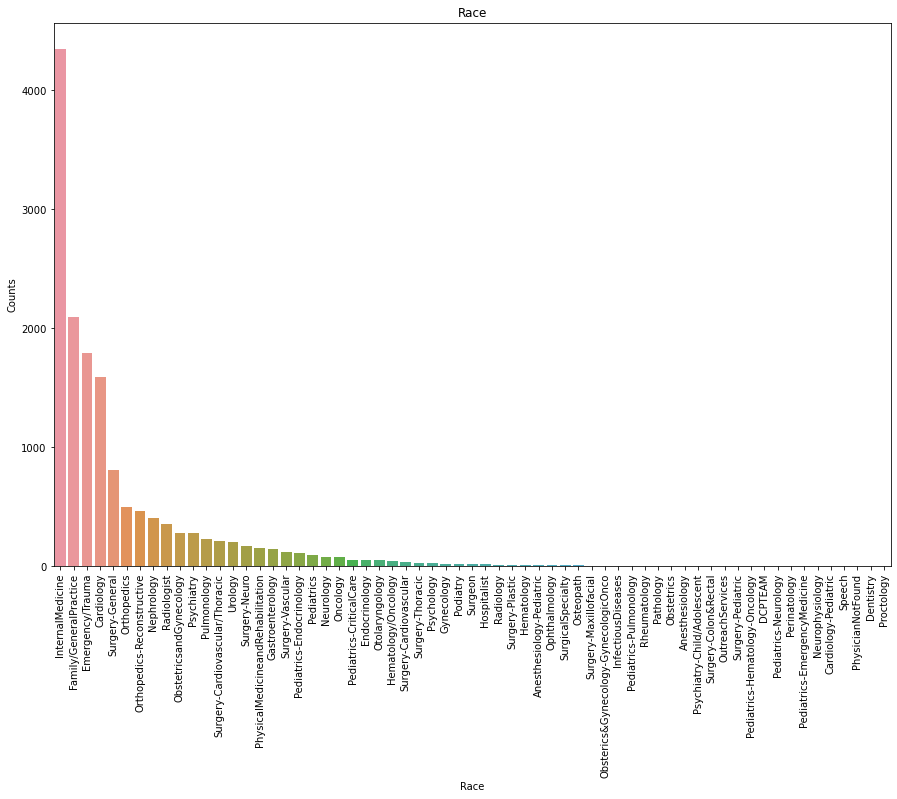

In [18]:
plt.figure(figsize=(15,10))
sns.barplot(x=medical_values_count.index, y=medical_values_count.medical_specialty)
plt.title('Race')
plt.xlabel('Race')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

In [19]:
df[df['medical_specialty'].isna()].shape

(13406, 25)

check the impact of null values on target variables

<AxesSubplot:xlabel='medical_specialty'>

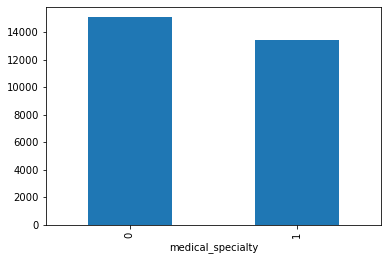

In [20]:
data = df.copy()
data['medical_specialty'] = np.where(data['medical_specialty'].isnull(),1,0)
data.groupby('medical_specialty')['Target'].count().plot.bar()

# lab procedures

In [21]:
df['num_lab_procedures'].unique()

array([ 11,  44,  55,  75,  29,  66,  33,  64,  46,  72,  10,  65,  54,
        58,  36,  51,  25,  35,  53,  56,  73,  22,  59,  31,  96,  39,
        48,  61,  70,   1,  18,  34,  45,  47,  57,  19,  41,  71,   2,
        37,  50,  60,  81,  67,  93, 103,  62,  68,  30,  52,  78,  69,
        49,  17,  43,  21,  95,  97,  14,  79,  23,  76,  63,  13,  28,
        40,  74,  38,  42,  86,  32,  20,   5,  27,  80,   6,  77,   8,
       100,   9,  15,  24,  12,  82,  92,  91,  83,  84,   4,  16,  89,
       101,  26,  88, 102,  94,  87,  90,  85,   3, 114,   7,  98, 105,
       111, 107, 106, 120, 109, 113, 108,  99, 121], dtype=int64)

There is no information about this feature. am assuming it means that the number of procedures were performed.

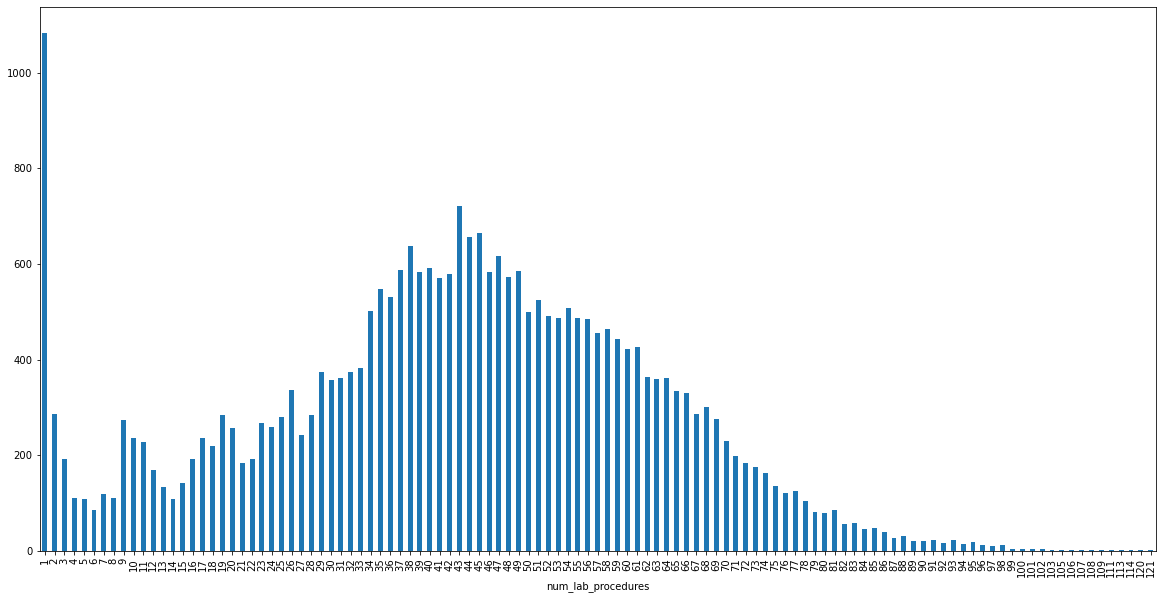

In [22]:
data = df.copy()

plt.figure(figsize=(20,10))
data.groupby('num_lab_procedures')['Target'].count().plot.bar()
plt.xticks(rotation=90)
plt.show()

# Procedures

In [23]:
df['num_procedures'].unique()

array([5, 1, 0, 3, 2, 4, 6], dtype=int64)

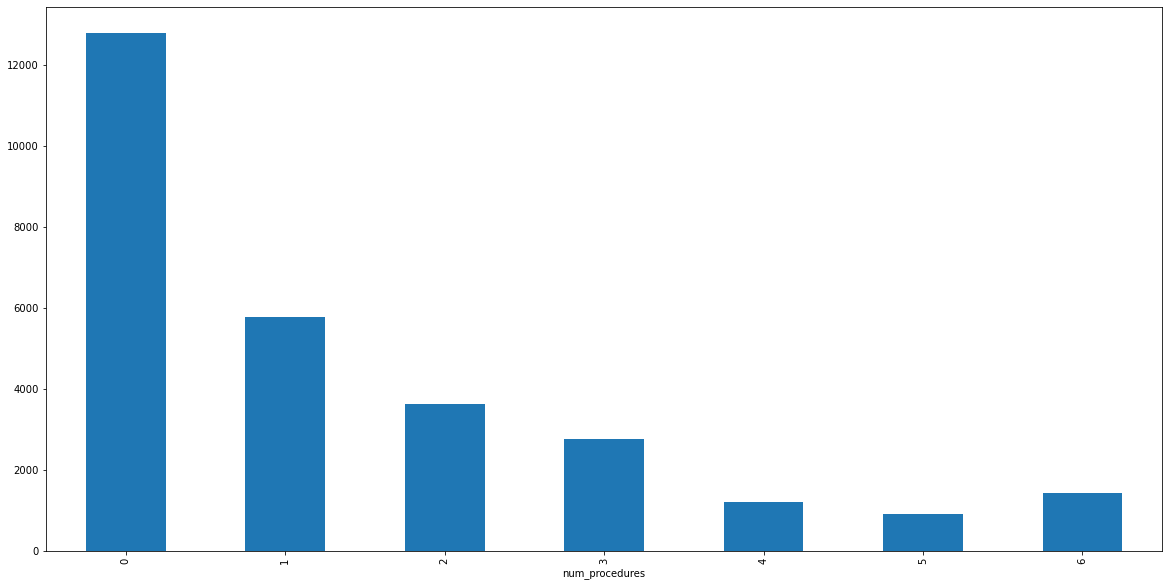

In [24]:
data = df.copy()

plt.figure(figsize=(20,10))
data.groupby('num_procedures')['Target'].count().plot.bar()
plt.show()

There are most number of patients that didn't even took a single procedure.

Lets check on the age of the people with their repective num of procedures

<AxesSubplot:xlabel='max_age'>

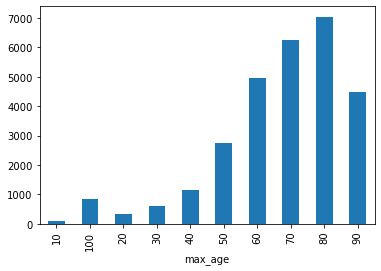

In [25]:
data = df.copy()

data['age'] = data['age'].str.replace('[','').str.replace(')','')
data[['min_age','max_age']] = data['age'].str.split('-',expand=True)

data.groupby('max_age')['Target'].count().plot.bar()

This says that the people with age of 60-80 are more likely to be diabetic.

In [26]:
data['max_age'] = pd.to_numeric(data['max_age'])

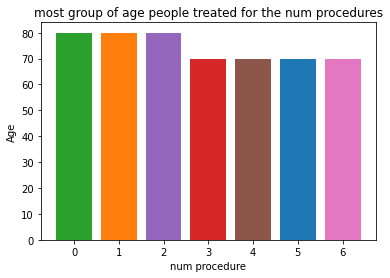

In [27]:
for i in df['num_procedures'].unique():
    temp_data = data[data['num_procedures'] == i]

    plt.bar(x=i,height=temp_data['max_age'].mode()[0])

plt.title('most group of age people treated for the num procedures')
plt.xlabel('num procedure')
plt.ylabel('Age')
plt.show()

patients that went through the most number of procedures are within the age group of 70-80

# medications

In [28]:
df['num_medications'].unique()

array([13, 16, 31, 11, 19,  7, 18, 20,  8, 27,  4, 14,  9, 21, 10, 23,  6,
       30, 17, 12, 26, 25,  5, 15,  3,  1, 28, 24, 61,  2, 33, 22, 36, 32,
       29, 40, 37, 45, 49, 41, 38, 42, 35, 39, 34, 47, 43, 44, 46, 52, 51,
       48, 53, 62, 50, 54, 57, 55, 56, 59, 63, 64, 69, 65, 60, 68, 58, 66],
      dtype=int64)

In [29]:
len(df['num_medications'].unique())

68

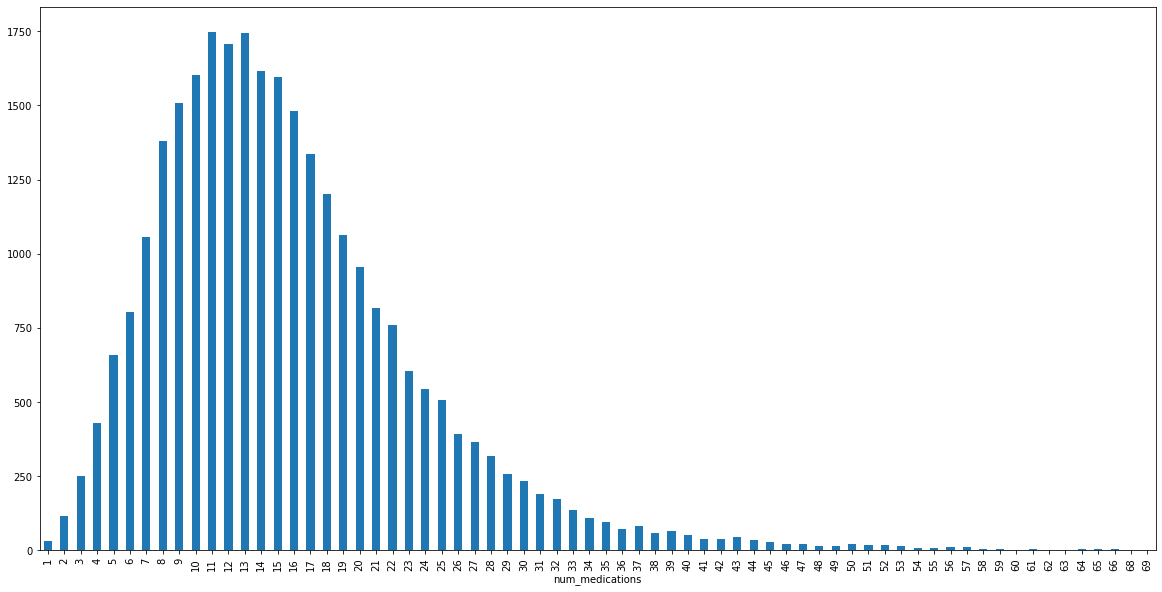

In [30]:
data = df.copy()

plt.figure(figsize=(20,10))
data.groupby('num_medications')['Target'].count().plot.bar()
plt.show()

# Outpatients, Emergency, inpatient

In [32]:
df['number_outpatient'].unique()

array([ 2,  0,  1,  3,  4,  8,  5, 11, 15,  6, 10,  7,  9, 12, 29, 14, 21,
       13, 17, 16, 25, 20, 24], dtype=int64)

In [33]:
df['number_emergency'].unique()

array([ 0,  1,  2,  6,  8, 25,  3,  4,  5,  7, 11, 12, 20, 16],
      dtype=int64)

In [34]:
df['number_inpatient'].unique()

array([ 1,  0,  5,  2,  3,  4,  8,  7,  6,  9, 10, 12, 16, 13],
      dtype=int64)

In [38]:
df.groupby('number_outpatient')['number_outpatient'].count()

number_outpatient
0     24643
1      1915
2       818
3       525
4       276
5       118
6        59
7        28
8        31
9        19
10       11
11        9
12        6
13        7
14        4
15        2
16        3
17        2
20        1
21        3
24        1
25        1
29        1
Name: number_outpatient, dtype: int64

In [39]:
df.groupby('number_emergency')['number_emergency'].count()

number_emergency
0     26157
1      1741
2       372
3       126
4        41
5        21
6         8
7         4
8         6
11        2
12        2
16        1
20        1
25        1
Name: number_emergency, dtype: int64

In [40]:
df.groupby('number_inpatient')['number_inpatient'].count()

number_inpatient
0     21166
1      4787
2      1508
3       593
4       236
5        89
6        45
7        30
8         7
9         8
10        8
12        3
13        1
16        2
Name: number_inpatient, dtype: int64

**outpatient, emergency, inpatient** These three features seems to be some kind of code that used in a hospital for the patients these can be neglected since more than 80% of the records seems to be entered as zero.

# Diag 1, Diag 2, Diag 3

diag_1, diag_2, diag_3 are three different factors used in identifying the diabetes they many different levels to indicate it.

In [71]:
print('diag_1 -',len(df['diag_1'].unique()))
print('diag_2 -',len(df['diag_2'].unique()))
print('diag_3 -',len(df['diag_3'].unique()))

diag_1 - 592
diag_2 - 600
diag_3 - 647


Top 50 Diag levels that is most commonly seen in the three features.

<AxesSubplot:xlabel='diag_1', ylabel='Target'>

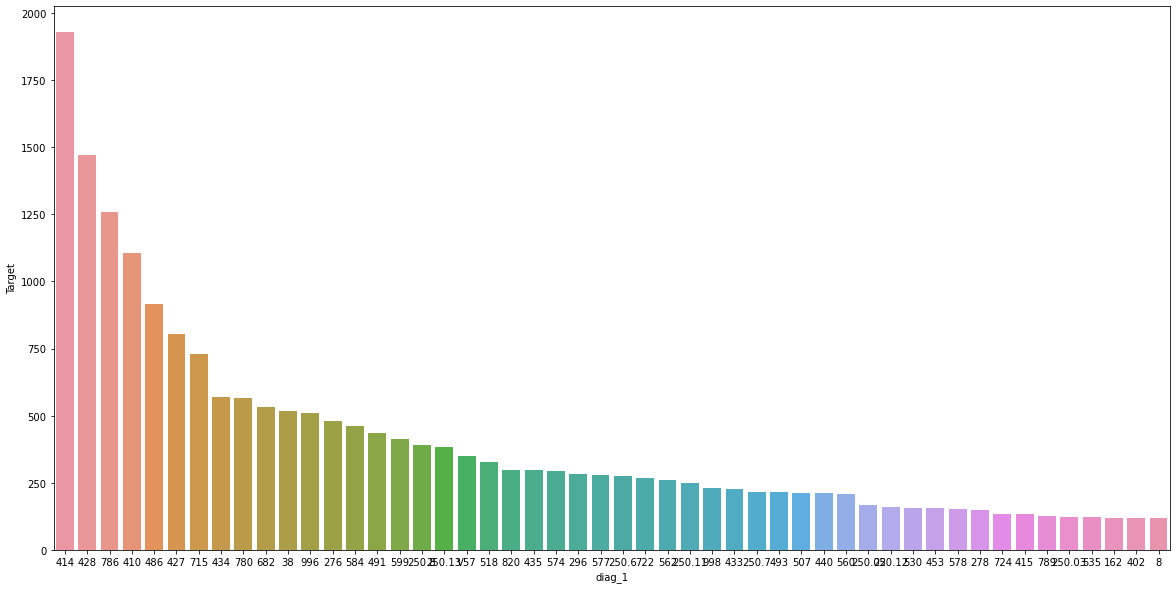

In [70]:
temp_data = df.groupby('diag_1')['Target'].count()
temp_data = pd.DataFrame(temp_data)
temp_data = temp_data.sort_values('Target',ascending = False)

data = temp_data.head(50)
plt.figure(figsize=(20,10))
sns.barplot(x=data.index, y = data.Target)

<AxesSubplot:xlabel='diag_2', ylabel='Target'>

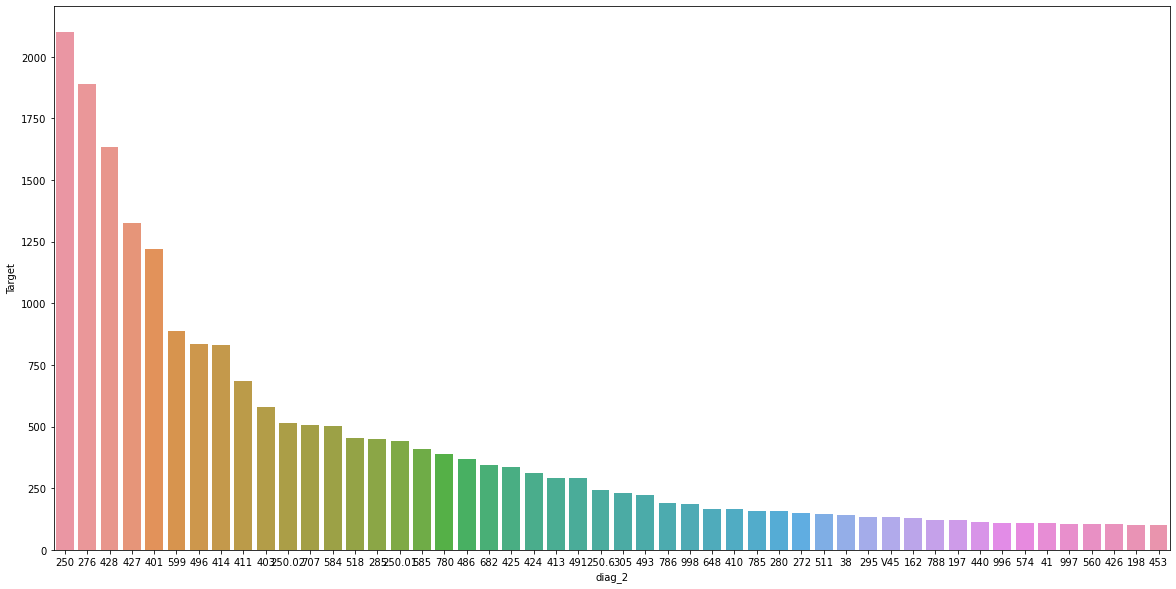

In [72]:
temp_data = df.groupby('diag_2')['Target'].count()
temp_data = pd.DataFrame(temp_data)
temp_data = temp_data.sort_values('Target',ascending = False)

data = temp_data.head(50)
plt.figure(figsize=(20,10))
sns.barplot(x=data.index, y = data.Target)

<AxesSubplot:xlabel='diag_3', ylabel='Target'>

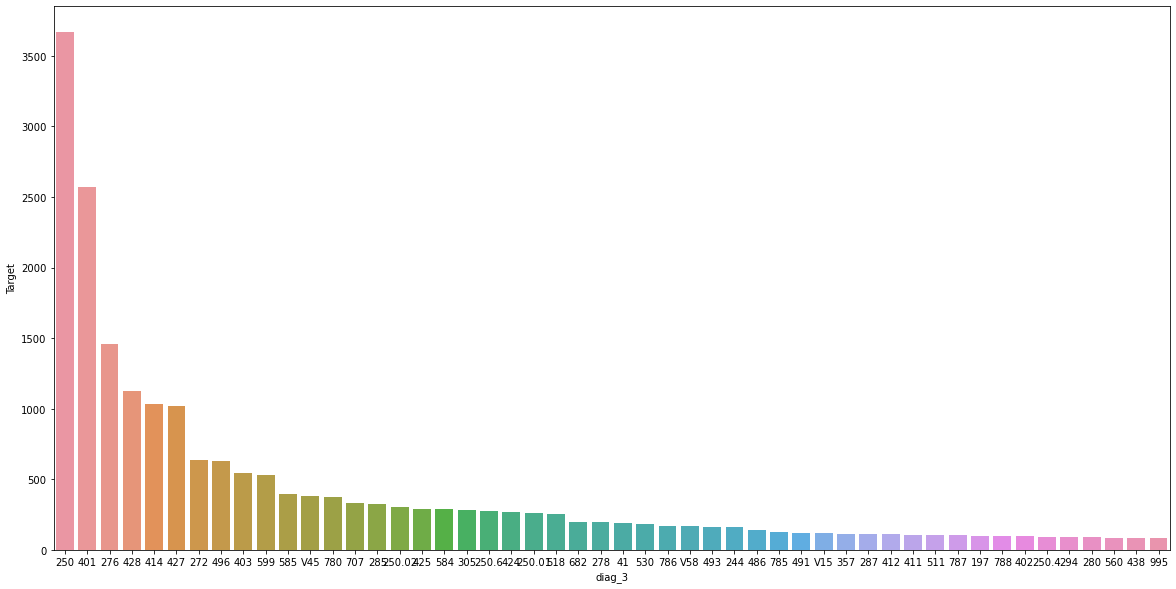

In [73]:
temp_data = df.groupby('diag_3')['Target'].count()
temp_data = pd.DataFrame(temp_data)
temp_data = temp_data.sort_values('Target',ascending = False)

data = temp_data.head(50)
plt.figure(figsize=(20,10))
sns.barplot(x=data.index, y = data.Target)

# Diagnoses

The number of diagnoses is a comorbidity measure based on all the ICD–9–CM and ICD–10–CA diagnosis codes attributed to patients during medical visits and hospitalizations over a specific period of time

In [74]:
df['number_diagnoses'].unique()

array([ 6,  7,  8,  9,  3,  5,  1,  4,  2, 13, 10, 12, 16, 15, 11, 14],
      dtype=int64)

In [75]:
len(df['number_diagnoses'].unique())

16

<AxesSubplot:xlabel='number_diagnoses', ylabel='Count'>

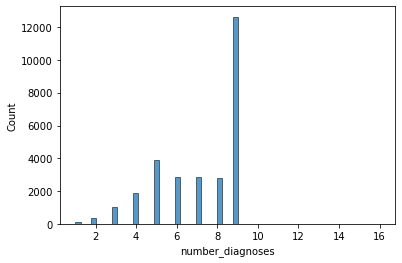

In [76]:
sns.histplot(df['number_diagnoses'])

Most of the patients are coded as 9 after the diagnosed.

# a1C Result

The hemoglobin A1c test tells you your average level of blood sugar over the past 2 to 3 months

In [78]:
df['A1Cresult'].unique()

array(['None', '>7', '>8', 'Norm'], dtype=object)

<AxesSubplot:xlabel='A1Cresult'>

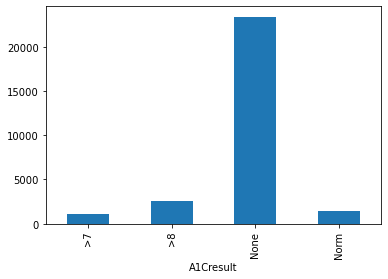

In [82]:
df.groupby('A1Cresult')['Target'].count().plot.bar()